<a href="https://colab.research.google.com/github/LokeshSaipureddi/Diabetic_retinopathy/blob/main/0_and_1234_messidor2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
!pip install -q kaggle

In [3]:
import tensorflow as tf

In [4]:
!pip install pydot

In [5]:
print(tf.__version__)

2.5.0


In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d 'xyaustin/messidor2'

100% 2.28G/2.29G [00:18<00:00, 120MB/s]
100% 2.29G/2.29G [00:18<00:00, 132MB/s]


In [9]:
!mkdir messidor2

In [10]:
! unzip messidor2.zip -d messidor2

Archive:  messidor2.zip
  inflating: messidor2/messidor-2/images/20051020_43808_0100_PP.png  
  inflating: messidor2/messidor-2/images/20051020_43832_0100_PP.png  
  inflating: messidor2/messidor-2/images/20051020_43882_0100_PP.png  
  inflating: messidor2/messidor-2/images/20051020_43906_0100_PP.png  
  inflating: messidor2/messidor-2/images/20051020_44261_0100_PP.png  
  inflating: messidor2/messidor-2/images/20051020_44284_0100_PP.png  
  inflating: messidor2/messidor-2/images/20051020_44338_0100_PP.png  
  inflating: messidor2/messidor-2/images/20051020_44349_0100_PP.png  
  inflating: messidor2/messidor-2/images/20051020_44400_0100_PP.png  
  inflating: messidor2/messidor-2/images/20051020_44431_0100_PP.png  
  inflating: messidor2/messidor-2/images/20051020_44598_0100_PP.png  
  inflating: messidor2/messidor-2/images/20051020_44636_0100_PP.png  
  inflating: messidor2/messidor-2/images/20051020_44692_0100_PP.png  
  inflating: messidor2/messidor-2/images/20051020_44714_0100_PP.pn

In [11]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D,Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.metrics import AUC,Precision,Recall
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import cv2
import itertools
import os
import shutil
import glob
import random
import matplotlib.pyplot as plt
import warnings

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D,Dropout,Input
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.metrics import AUC,Precision,Recall
from sklearn.model_selection import KFold
import math
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import cv2
import itertools
import os
import shutil
import glob

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization,\
    Dropout, Dense, Input, concatenate, ZeroPadding2D,  \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten, add, Activation, Flatten,GlobalMaxPool2D
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import AUC, Precision, Recall, FalseNegatives, FalsePositives,TrueNegatives,TruePositives, CategoricalCrossentropy
from tensorflow.keras.models import load_model
from skimage.filters import threshold_yen
from skimage.exposure import rescale_intensity
from sklearn.model_selection import KFold
#from scikitplot.metrics import plot_confusion_matrix, plot_roc
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten,Reshape, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.layers import GlobalMaxPool2D, Concatenate
import math  
import matplotlib.pyplot as plt
import os

import numpy as np

In [14]:
os.mkdir("/content/messidor2/messidor-2/0")
os.mkdir("/content/messidor2/messidor-2/1")
os.mkdir("/content/messidor2/messidor-2/2")
os.mkdir("/content/messidor2/messidor-2/3")
os.mkdir("/content/messidor2/messidor-2/4")

In [15]:
import os
os.remove("/content/messidor2/messidor-2/images/20060411_58550_0200_PP.png")
os.remove("/content/messidor2/messidor-2/images/IM002385.jpg")
os.remove("/content/messidor2/messidor-2/images/IM003718.jpg")
os.remove("/content/messidor2/messidor-2/images/IM004176.jpg")
# importing pandas module


In [16]:
import pandas as pd

# making data frame from csv file
data = pd.read_csv("/content/messidor2/messidor-2/messidor_data.csv")

# making new data frame with dropped NA values
data.dropna(subset=["adjudicated_dr_grade"],inplace=True)
data.to_csv('messidor_data2.csv')
# comparing sizes of data frames
print("Old data frame length:", len(data))

os.remove("/content/messidor2/messidor-2/messidor_data.csv")
import shutil
shutil.move("/content/messidor_data2.csv","/content/messidor2/messidor-2")


Old data frame length: 1744


'/content/messidor2/messidor-2/messidor_data2.csv'

In [17]:
import shutil, os
import pandas as pd

labels = pd.read_csv("/content/messidor2/messidor-2/messidor_data2.csv")
labels = labels.sort_values('adjudicated_dr_grade')

In [18]:
class_names = list(labels.adjudicated_dr_grade.unique())
print(class_names)

[0.0, 1.0, 2.0, 3.0, 4.0]


In [19]:
class_names = list(labels.adjudicated_dr_grade.unique())
A = [int(class_names) for class_names in class_names]
print(A)

[0, 1, 2, 3, 4]


In [20]:
for c in A: # Category Name
  for i in list(labels[labels['adjudicated_dr_grade']==c]['image_id']): # Image Id
    get_image = os.path.join('/content/messidor2/messidor-2/images/', i) # Path to Images
    move_image_to_cat = shutil.copy(get_image, '/content/messidor2/messidor-2/'+str(c))

In [21]:
ls1=os.listdir('/content/messidor2/messidor-2/1')
ls2=os.listdir('/content/messidor2/messidor-2/2')
ls3=os.listdir('/content/messidor2/messidor-2/3')
ls4=os.listdir('/content/messidor2/messidor-2/4')
os.mkdir('/content/messidor2/messidor-2/comb1234')

In [22]:
path='/content/messidor2/messidor-2'
dest='/content/messidor2/messidor-2/comb1234'
for i in ls1:
  img_scr=path+'/1/'+str(i)
  shutil.move(img_scr,dest)

In [23]:
path='/content/messidor2/messidor-2'
dest='/content/messidor2/messidor-2/comb1234'
for i in ls2:
  img_scr=path+'/2/'+str(i)
  shutil.move(img_scr,dest)

In [24]:
path='/content/messidor2/messidor-2'
dest='/content/messidor2/messidor-2/comb1234'
for i in ls3:
  img_scr=path+'/3/'+str(i)
  shutil.move(img_scr,dest)

In [25]:
path='/content/messidor2/messidor-2'
dest='/content/messidor2/messidor-2/comb1234'
for i in ls4:
  img_scr=path+'/4/'+str(i)
  shutil.move(img_scr,dest)

In [26]:
for i in range(1,5):
  shutil.rmtree('/content/messidor2/messidor-2/'+str(i))

In [27]:
os.rename('/content/messidor2/messidor-2/comb1234','/content/messidor2/messidor-2/1')

In [28]:
original_data_path = "/content/messidor2/messidor-2"
train_pct = 0.7
test_pct = 0.3

if os.path.isdir("/content/messidor2/messidor-2/train/0") is False:
    # create folders for the sets
    os.mkdir("/content/messidor2/messidor-2/train")
    os.mkdir("/content/messidor2/messidor-2/test")
    for i in range(0, 2):
        # path to inputs with different classes
        num_folder_path = f'{original_data_path}/{i}' 
        num_files_in_folder = len(os.listdir(num_folder_path))
        train_size1 = int(num_files_in_folder * train_pct)
        test_size1 = int(num_files_in_folder * test_pct)
        train_size = train_size1
        test_size = test_size1
        os.mkdir(f'/content/messidor2/messidor-2/train/{i}')
        os.mkdir(f'/content/messidor2/messidor-2/test/{i}')
        test_samples = random.sample(os.listdir(num_folder_path), test_size)
        for file_name in test_samples:
            shutil.move((f"/content/messidor2/messidor-2/{i}/{file_name}"), f'/content/messidor2/messidor-2/test/{i}')
        train_samples = random.sample(os.listdir(num_folder_path), train_size)
        for file_name in train_samples:
            shutil.move((f"/content/messidor2/messidor-2/{i}/{file_name}"), f'/content/messidor2/messidor-2/train/{i}')

In [29]:
import filecmp

In [30]:
result = filecmp.dircmp('/content/messidor2/messidor-2/test/0', '/content/messidor2/messidor-2/train/0')

In [31]:
result.report()

diff /content/messidor2/messidor-2/test/0 /content/messidor2/messidor-2/train/0
Only in /content/messidor2/messidor-2/test/0 : ['20051020_44431_0100_PP.png', '20051020_44692_0100_PP.png', '20051020_44982_0100_PP.png', '20051020_56791_0100_PP.png', '20051020_57157_0100_PP.png', '20051020_57967_0100_PP.png', '20051020_62461_0100_PP.png', '20051020_62577_0100_PP.png', '20051020_62615_0100_PP.png', '20051020_64249_0100_PP.png', '20051021_57862_0100_PP.png', '20051021_57975_0100_PP.png', '20051021_58522_0100_PP.png', '20051109_60136_0400_PP.png', '20051110_35239_0400_PP.png', '20051110_37992_0400_PP.png', '20051110_38472_0400_PP.png', '20051110_38507_0400_PP.png', '20051117_37100_0400_PP.png', '20051117_37130_0400_PP.png', '20051117_37155_0400_PP.png', '20051117_37185_0400_PP.png', '20051130_54077_0400_PP.png', '20051130_54257_0400_PP.png', '20051130_54498_0400_PP.png', '20051130_54802_0400_PP.png', '20051130_54943_0400_PP.png', '20051130_55004_0400_PP.png', '20051130_55107_0400_PP.png', '2

In [32]:
train_path="/content/messidor2/messidor-2/train"
test_path="/content/messidor2/messidor-2/test"

In [33]:
CLASS_MODE = "categorical"
BATCH_SIZE = 16
train_batches = ImageDataGenerator(rescale=1./223,
                                   featurewise_center=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.5).flow_from_directory(directory = train_path, target_size = (224,224), batch_size = BATCH_SIZE, class_mode=CLASS_MODE,shuffle=True)
test_batches = ImageDataGenerator(rescale=1./223).flow_from_directory(directory = test_path, target_size = (224,224), batch_size = BATCH_SIZE, class_mode=CLASS_MODE, shuffle=False)

Found 1219 images belonging to 2 classes.
Found 523 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)


<Figure size 432x288 with 0 Axes>

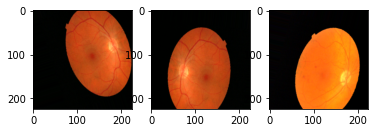

In [34]:
plt.figure()
f, axarr = plt.subplots(1,3)
for i in range (0,3):
    random_num = random.randint(0,5)
    image = train_batches[random_num]
    axarr[i].imshow(image[0][0])
    print(np.shape(image[0][0])) 

In [35]:
IMG_SIZE = (224,224)
batch_size = 64
epoch = 200

In [36]:
from tensorflow.keras import layers, Sequential

In [37]:
def residual_module(layer_in, n_filters,seq_strides=2,short_cut_stride=2):
    merge_input = layer_in
    x = Conv2D(n_filters, (1,1), strides=seq_strides, padding='same', kernel_initializer='he_normal',kernel_regularizer=l2())(layer_in)
    x = BatchNormalization(axis=3)(x)
    x = Activation('linear')(x)
    reduction_ratio=16
    avgpool = GlobalAveragePooling2D()(x)
    maxpool = GlobalMaxPool2D()(x)
    # Shared MLP
    Dense_layer1 = Dense(n_filters//reduction_ratio, activation='relu')
    Dense_layer2 = Dense(n_filters, activation='relu')
    avg_out = Dense_layer2(Dense_layer1(avgpool))
    max_out = Dense_layer2(Dense_layer1(maxpool))
    channel = layers.add([avg_out, max_out])
    channel = Activation('sigmoid')(channel)
    channel = Reshape((1,1,n_filters))(channel)
    channel_out = tf.multiply(x, channel)
    avgpool = tf.reduce_mean(channel_out, axis=3, keepdims=True)
    maxpool = tf.reduce_max(channel_out, axis=3, keepdims=True)
    spatial = Concatenate(axis=3)([avgpool, maxpool])
    spatial = Conv2D(1, (7,7), strides=1, padding='same')(spatial)
    spatial_out = Activation('sigmoid')(spatial)
    CBAM_out = tf.multiply(channel_out, spatial_out)
    x = Conv2D(n_filters, (3,3), strides=seq_strides, padding='same', kernel_initializer='he_normal',kernel_regularizer=l2())(layer_in)
    x = layers.add([CBAM_out, x])
    # activation function
    layer_out = Activation('relu')(x)
    return layer_out

input_layer = Input(shape=(256,256,3))
x = residual_module(input_layer,128)
x = residual_module(x,16)
x = MaxPooling2D(pool_size=(3,3),strides=2,padding='same')(x)
x = residual_module(x,16)
x = MaxPooling2D(pool_size=(3,3),strides=2,padding='same')(x)
x = residual_module(x,32)
x = MaxPooling2D(pool_size=(3,3),strides=2,padding='same')(x)
x = residual_module(x,32)
x = MaxPooling2D(pool_size=(3,3),strides=2,padding='same')(x)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.30)(x)
x = Dense(512,activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2())(x)
output = Dense(2,activation='sigmoid')(x)
model = Model(inputs=input_layer,outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 128 512         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 128 512         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 128 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [50]:
model = tf.keras.applications.ResNet50V2(weights='imagenet', input_shape=(224,224,3), include_top=False)
model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [51]:
x = Flatten()(model.layers[-90].output)
x=Dense(units=8)(x)
output = Dense(units=2, activation="sigmoid")(x)
model = Model(inputs = model.input, outputs = output)

In [55]:
initial_lrate = 0.0001
def decay(epoch, steps=10):
    initial_lrate = 0.000008
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate
opt = RMSprop(lr=initial_lrate)
lr_sc = LearningRateScheduler(decay, verbose=1)
model.compile(optimizer=opt,
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy',AUC(),Precision(),Recall(),FalsePositives(),TrueNegatives(),TruePositives(),FalseNegatives()])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [56]:
checkpoint = ModelCheckpoint("with_chmod_100_spatial.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, verbose=1, mode='auto',patience=25)
callback = [checkpoint,early]
hist = model.fit(train_batches, validation_data=test_batches , epochs=epoch,callbacks=callback)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/200
77/77 [==============================] - 158s 1s/step - loss: 1.0875 - accuracy: 0.5587 - auc_3: 0.5689 - precision_3: 0.5632 - recall_3: 0.5701 - false_positives_3: 539.0000 - true_negatives_3: 680.0000 - true_positives_3: 695.0000 - false_negatives_3: 524.0000 - val_loss: 2.1325 - val_accuracy: 0.4168 - val_auc_3: 0.4942 - val_precision_3: 0.4168 - val_recall_3: 0.4168 - val_false_positives_3: 305.0000 - val_true_negatives_3: 218.0000 - val_true_positives_3: 218.0000 - val_false_negatives_3: 305.0000

Epoch 00001: val_accuracy improved from -inf to 0.41683, saving model to with_chmod_100_spatial.h5
Epoch 2/200
77/77 [==============================] - 98s 1s/step - loss: 0.7468 - accuracy: 0.6333 - auc_3: 0.6830 - precision_3: 0.6363 - recall_3: 0.6185 - false_positives_3: 431.0000 - true_negatives_3: 788.0000 - true_positives_3: 754.0000 - false_negatives_3: 465.0000 - val_loss: 0.6615 - val_accuracy: 0.6272 - val_auc_3: 0.6904 - val_precision_3: 0.6348 - val_recall_3: 0.

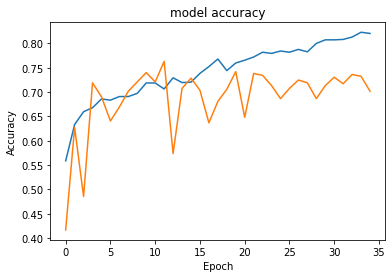

In [57]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

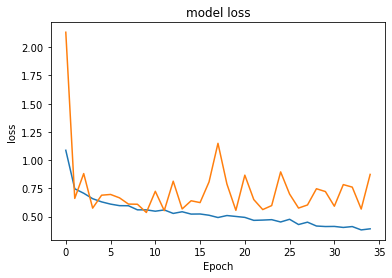

In [58]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.show()

In [59]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [60]:
target_names = []

for key in train_batches.class_indices:

    target_names.append(key)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
Normalized confusion matrix


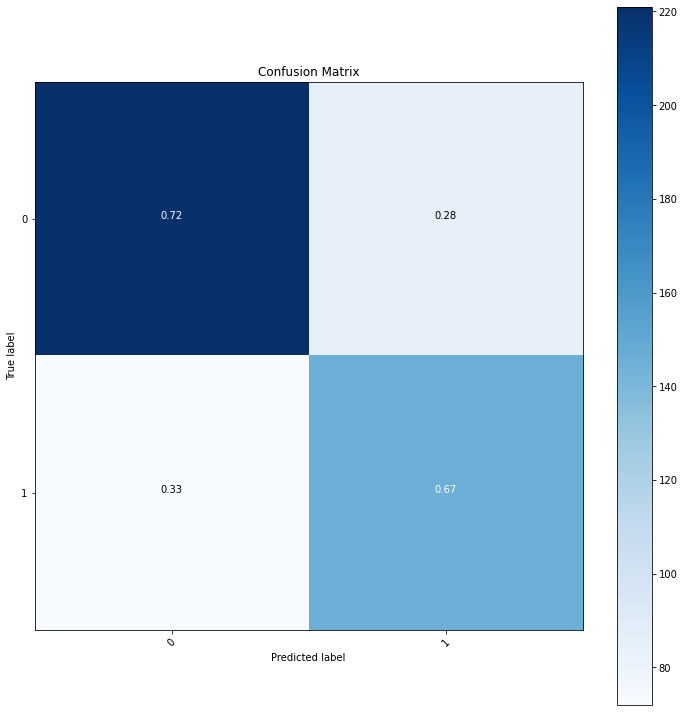

In [61]:
Y_pred = model.predict_generator(test_batches)

y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(test_batches.classes, y_pred)

plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [62]:
model.load_weights('with_chmod_100_spatial.h5')

In [63]:
model_metrics = model.evaluate(test_batches,verbose=0)

In [64]:
f1_score = 2*( (model_metrics[3]*model_metrics[4]) / (model_metrics[3]+model_metrics[4]) )

In [65]:
print(f"Accuracy on test set: {round(model_metrics[1]*100,2)}%")
print(f"ROC(Receiver Operation Characteristic) AUC(Area Under Curve): {model_metrics[2]}")
print(f"Precision: {round(model_metrics[3]*100,2)}%")
print(f"Recall: {round(model_metrics[4]*100,2)}%")
print(f"F1-score: {f1_score}")
print(f"Specificity: {(model_metrics[6])/(model_metrics[6]+model_metrics[5])}")

Accuracy on test set: 76.29%
ROC(Receiver Operation Characteristic) AUC(Area Under Curve): 0.8233094215393066
Precision: 76.19%
Recall: 76.48%
F1-score: 0.763358793071684
Specificity: 0.7609942638623327
